In [1]:
import numpy as np
import os
from pathlib import Path
import tarfile
import matplotlib.pyplot as plt

from nilearn import plotting, image, datasets
from nilearn.maskers import NiftiSpheresMasker
from nilearn.connectome import ConnectivityMeasure
import nibabel as nib

from sklearn.covariance import GraphicalLassoCV

In [2]:
folder = 'HCP_PTN1200/node_timeseries/3T_HCP1200_MSMAll_d100_ts2'

# Get a list of fMRI data for all 1003 subjects
file_paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.txt')]

BRAIN REGIONS:
--------------
Right_OCP_occipital_pole
Right_AnG_angular_gyrus
Right_IOG_inferior_occipital_gyrus
Left_Cun_cuneus
Left_SMG_supramarginal_gyrus
Right_MOG_middle_occipital_gyrus
Right_SMG_supramarginal_gyrus
Right_MOG_middle_occipital_gyrus
Left_AnG_angular_gyrus
Right_PCu_precuneus
Right_LiG_lingual_gyrus
Left_SMG_supramarginal_gyrus
Left_SOG_superior_occipital_gyrus
Left_AnG_angular_gyrus
Left_PCu_precuneus
Right_SOG_superior_occipital_gyrus
Right_Calc_calcarine_cortex
Right_SPL_superior_parietal_lobule
no_label
Left_MOG_middle_occipital_gyrus
Left_PoG_postcentral_gyrus
no_label
Right_SMG_supramarginal_gyrus
Right_AnG_angular_gyrus
Left_OCP_occipital_pole
Left_MFG_middle_frontal_gyrus
Right_SPL_superior_parietal_lobule
Left_OCP_occipital_pole
Left_MTG_middle_temporal_gyrus
Right_IOG_inferior_occipital_gyrus
Right_STG_superior_temporal_gyrus
Right_Cerebral_White_Matter
Left_MFG_middle_frontal_gyrus
Left_SPL_superior_parietal_lobule
Left_SMG_supramarginal_gyrus
Left_MSFG_

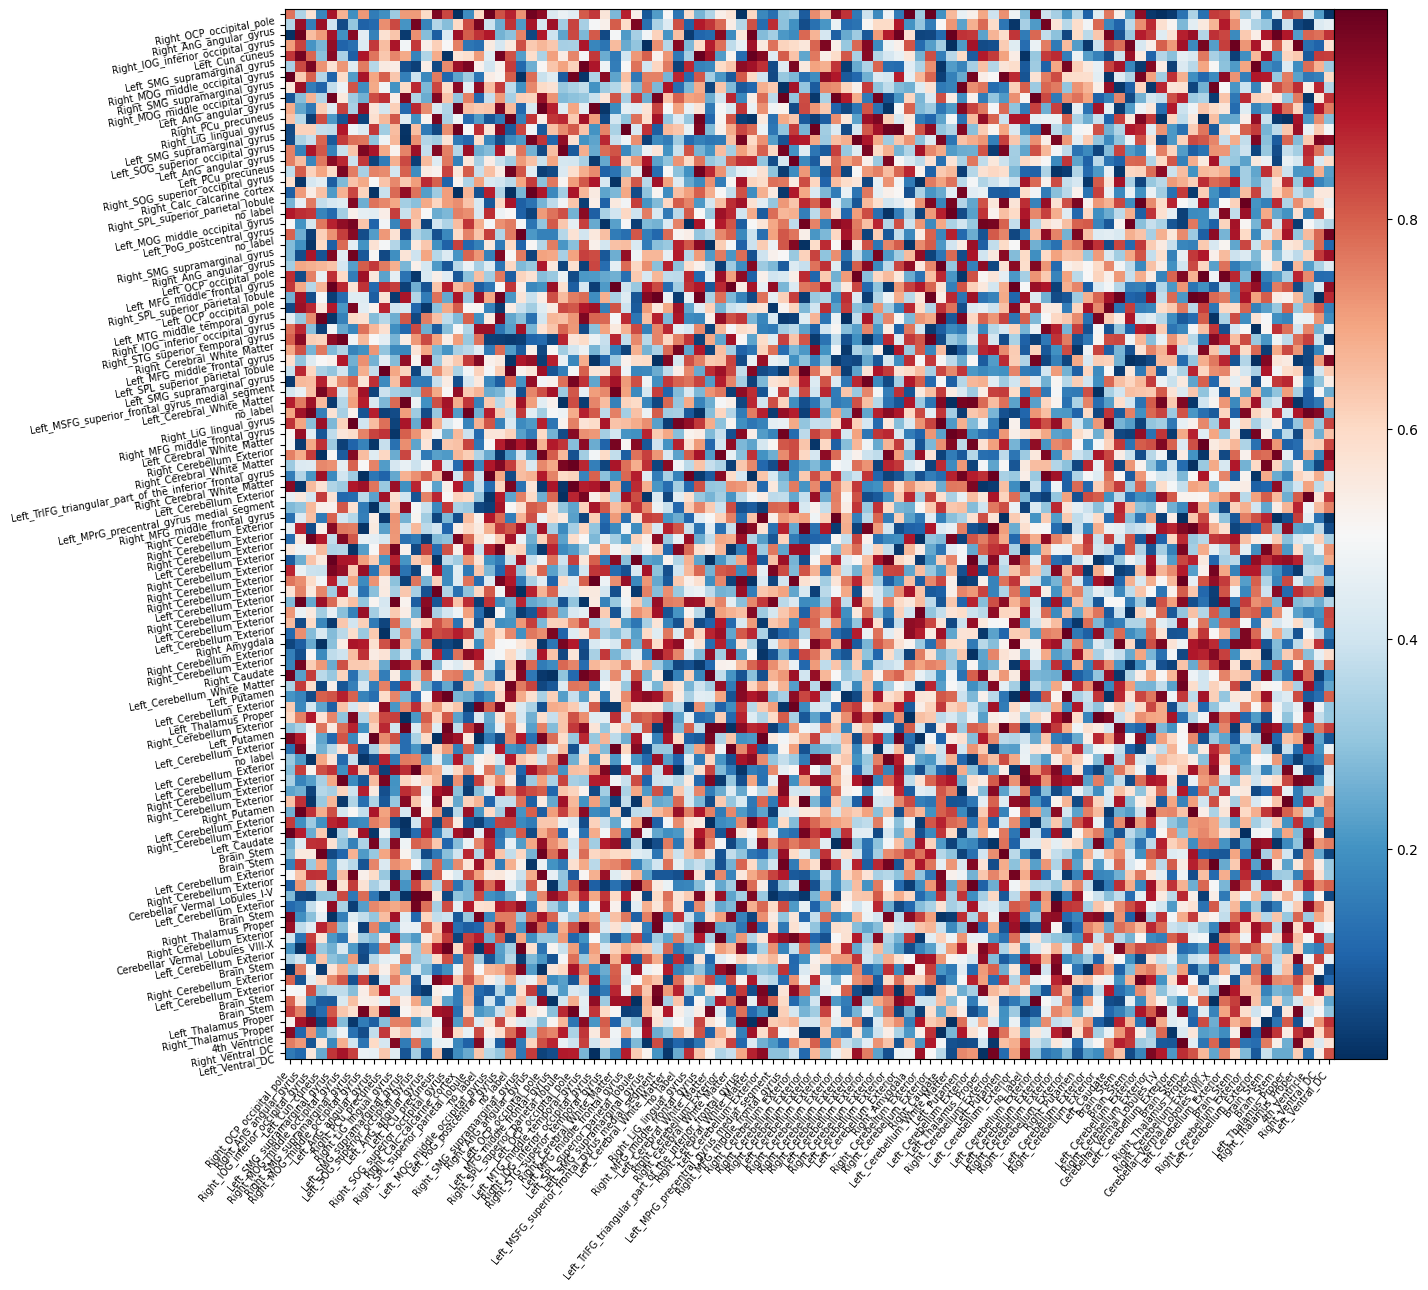

In [12]:
from nilearn import image, plotting
from atlasreader.atlasreader import read_atlas_peak

"""
available reference atlases
---------------------------
    "aal",
    "aicha",
    "desikan_killiany",
    "destrieux",
    "harvard_oxford",
    "juelich",
    "marsatlas",
    "neuromorphometrics",
    "talairach_ba",
    "talairach_gyrus",
 """

atlas = image.threshold_img("HCP_PTN1200/groupICA/groupICA_3T_HCP1200_MSMAll_d100.ica/melodic_IC_sum.nii.gz", "99.5%") 
atlas_coords = plotting.find_probabilistic_atlas_cut_coords(atlas)

region_labels = []

# Load the ICA components NIfTI file
ica_img = image.load_img('/mnt/data/melodic_IC_sum.nii.gz')


print("BRAIN REGIONS:\n--------------")

# Retrieve and print brain region names
for atlas_coord in atlas_coords:
    region = read_atlas_peak("neuromorphometrics", atlas_coord)
    region_label = region
    
    region_labels.append(region_label)
    print(region_label)

# I'm not really sure what data should we apply this onto? is it the timeseries data or ICA data? Which file??
# So I am using a random data...
n_regions = len(region_labels)
connectivity_matrix = np.random.rand(n_regions, n_regions)

# connectivity matrix with labeled regions
plotting.plot_matrix(
    connectivity_matrix,
    labels=region_labels,
    figure=(20, 12), 
    colorbar=True
)
